__Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?__

__Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.__

__Описание данных__

Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

___

# Шаг №1. Загрузите данные и подготовьте их к анализу

Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import requests

import scipy.stats as stats
from scipy import stats as st
from pandas.io.json import json_normalize
from pprint import pprint
from io import BytesIO


import math
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv('/datasets/rest_data.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [4]:
#Изменим название столбца, чтобы было понятнее
df = df.rename(columns={'number':'number_of_seats'})

In [5]:
#Проверим есть ли дубликаты
df.duplicated().sum()

0

In [6]:
df['chain'] = df['chain'].map({'нет':'сеть','да':'несетевое'})
df['object_type'] = df['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')
df['object_type'] = df['object_type'].str.replace('магазин \(отдел кулинарии\)', 'кулинария')
df['address'] = df['address'].str.replace('ё','е')

__Вывод:__
Переименовали столбец, посмотрели инфо по всему фрейму, попробовали почистить дубли, но все равно дублей не нашли. Откорректировали название для чёткости понимания.

___

# Шаг №2. Анализ данных

__Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.__

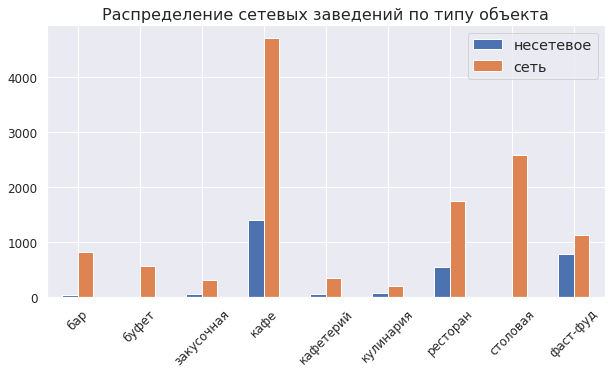

In [7]:
#Рассчитаем количество посадочных мест в объектах общественного питания
fig, ax = plt.subplots(figsize=[10,5])
object_type_x_chain = df.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count')
object_type_x_chain.plot(kind = 'bar', ax=ax)
plt.title('Распределение сетевых заведений по типу объекта',fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.xlabel(' ',fontsize=13)
plt.legend(fontsize ='large');

In [8]:
df_chains = df.loc[df['chain'] == 'сеть']

<Figure size 720x288 with 0 Axes>

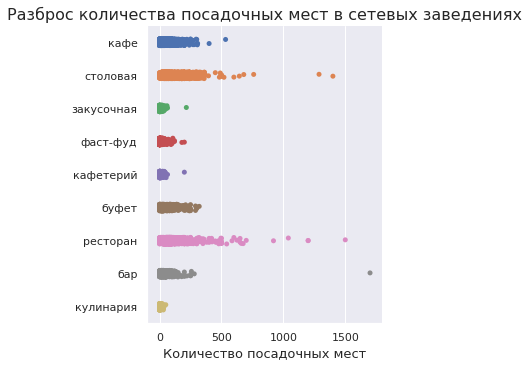

In [9]:
plt.figure(figsize=(10, 4))
sns.catplot(data=df_chains, y='object_type', x='number_of_seats')
plt.title('Разброс количества посадочных мест в сетевых заведениях',fontsize=16)
plt.xlabel('Количество посадочных мест',fontsize=13)
plt.ylabel('',fontsize=13);

__Вывод:__ Безусловный лидер - кафе. Их более 6 тыс. Далее в топ-4 входят: столовые, рестораны и фаст-фуд.

___

__Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.__

In [10]:
df.groupby('chain')['object_name'].count().sort_values()

chain
несетевое     2968
сеть         12398
Name: object_name, dtype: int64

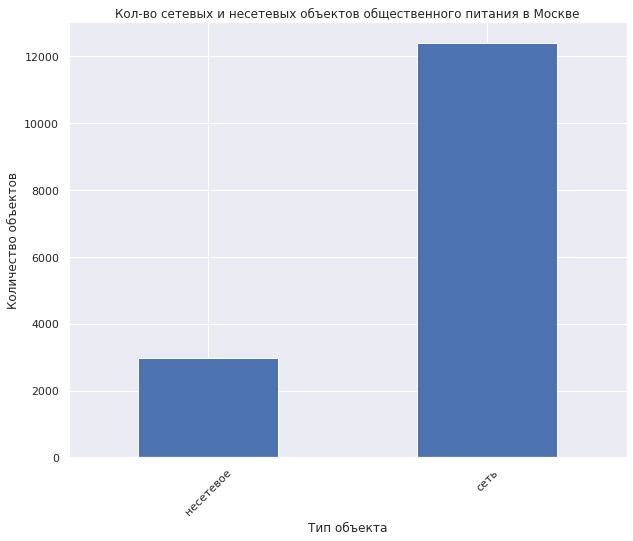

In [11]:
ax = df.groupby('chain')['object_name'].count().sort_values().plot(kind='bar')
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество объектов')
ax.set_title('Кол-во сетевых и несетевых объектов общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

__Вывод:__ Количество сетевых объектов в 4 раза выше несетевых.

___

__Для какого вида объекта общественного питания характерно сетевое распространение?__

In [12]:
web = 'сеть'

In [13]:
temp = df.query('chain == @web')

In [14]:
web_new = temp['object_type'].unique().tolist()
web_new

['кафе',
 'столовая',
 'закусочная',
 'фаст-фуд',
 'кафетерий',
 'буфет',
 'ресторан',
 'бар',
 'кулинария']

In [15]:
temp.groupby('object_type')['object_name'].count().sort_values()

object_type
кулинария      195
закусочная     304
кафетерий      346
буфет          574
бар            819
фаст-фуд      1132
ресторан      1741
столовая      2584
кафе          4703
Name: object_name, dtype: int64

In [16]:
chain_df = df.groupby(['chain', 'object_type'], as_index=False).agg({
    'id':'count'}).sort_values('id', ascending=False).rename(columns = {'id':'count'})
chain_df

,chain,object_type,count
12,сеть,кафе,4703
16,сеть,столовая,2584
15,сеть,ресторан,1741
3,несетевое,кафе,1396
17,сеть,фаст-фуд,1132
9,сеть,бар,819
8,несетевое,фаст-фуд,791
10,сеть,буфет,574
6,несетевое,ресторан,544
13,сеть,кафетерий,346


In [17]:
y_chain = chain_df[chain_df['chain'] == 'сеть']
n_chain = chain_df[chain_df['chain'] == 'несетевое']

In [18]:
chain_new = y_chain.merge(n_chain, how='left', on='object_type')
chain_new = chain_new.drop(['chain_x', 'chain_y'], 1).rename(columns = {'count_x':'chain_count', 'count_y':'no_chain_count'})
chain_new['total'] = chain_new['chain_count'] + chain_new['no_chain_count']
chain_new['ratio'] = ((chain_new['no_chain_count'] / chain_new['total']) *100).round(2)
chain_new

,object_type,chain_count,no_chain_count,total,ratio
0,кафе,4703,1396,6099,22.89
1,столовая,2584,3,2587,0.12
2,ресторан,1741,544,2285,23.81
3,фаст-фуд,1132,791,1923,41.13
4,бар,819,37,856,4.32
5,буфет,574,11,585,1.88
6,кафетерий,346,52,398,13.07
7,закусочная,304,56,360,15.56
8,кулинария,195,78,273,28.57


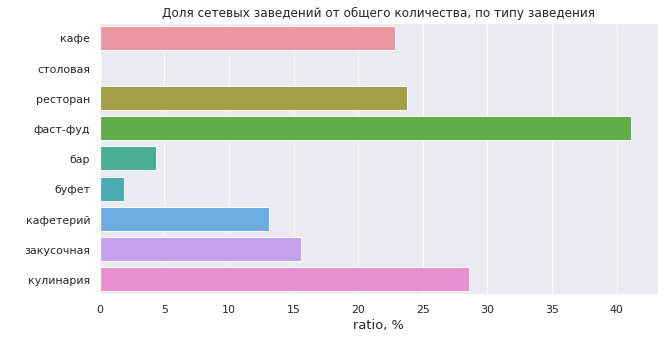

In [19]:
sns.set_palette("GnBu_d")
fig, ax = plt.subplots(figsize=[10,5])
sns.barplot(data=chain_new, y='object_type', x='ratio')
plt.title('Доля сетевых заведений от общего количества, по типу заведения')
plt.ylabel(' ',fontsize=13);
plt.xlabel('ratio, %',fontsize=13);

__Вывод:__ По долям сетевых заведений от общего количества однозначно лидируют фаст-фуды и кулинария. Сетевых столовых, буфетов и баров крайне мало.

___

__Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?__

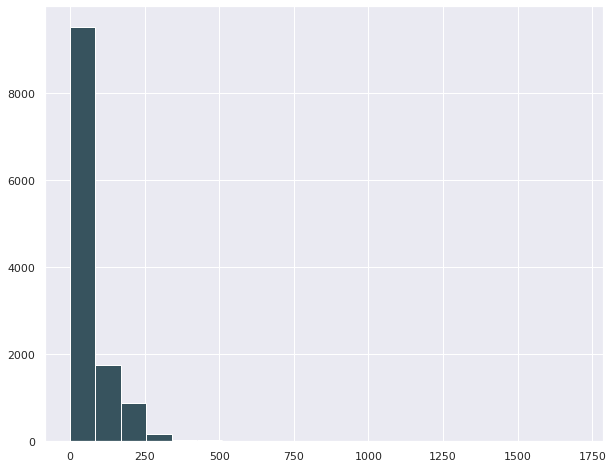

In [20]:
temp['number_of_seats'].hist(bins=20)
plt.show()

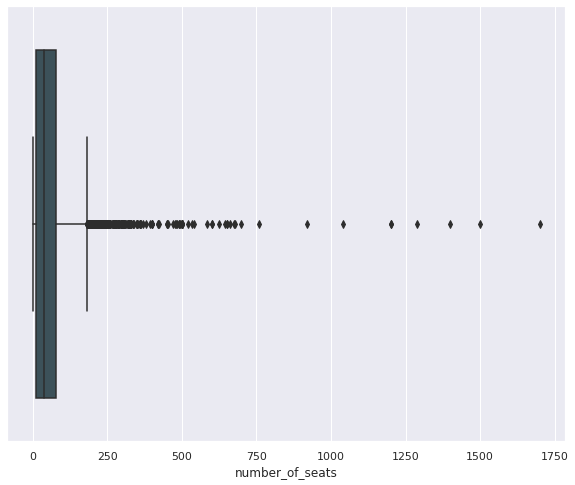

In [21]:
ax = sns.boxplot(x=temp['number_of_seats'])

In [22]:
temp['number_of_seats'].describe()

count   12,398.00
mean        61.13
std         78.28
min          0.00
25%         12.00
50%         40.00
75%         80.00
max      1,700.00
Name: number_of_seats, dtype: float64

__Вывод:__ Много заведений, но мало мест. Среднее значение по местам - 40.

___

__Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.__

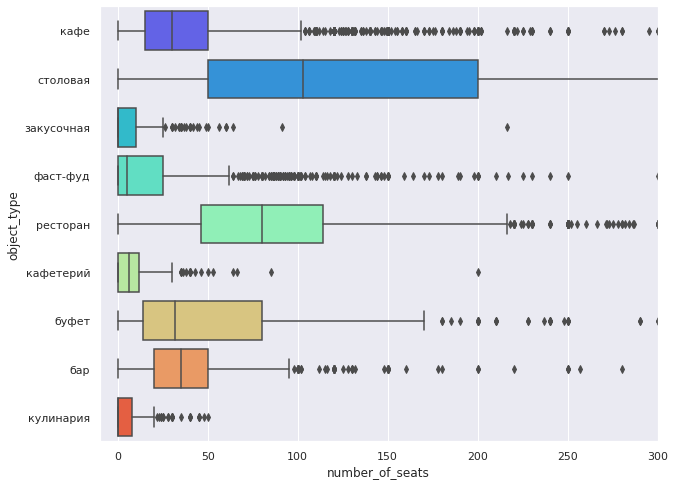

In [23]:
ax = sns.boxplot(x='number_of_seats', y='object_type', data=df, palette="rainbow")
ax.set_xlim(-10,300)
plt.show()

In [24]:
df.groupby('object_type')['number_of_seats'].describe().sort_values(by='50%')

,count,mean,std,min,25%,50%,75%,max
object_type,,,,,,,,
закусочная,360.00,7.61,16.65,0.00,0.00,0.00,10.00,216.00
кулинария,273.00,5.59,9.87,0.00,0.00,0.00,8.00,50.00
фаст-фуд,"1,923.00",20.55,38.37,0.00,0.00,5.00,25.00,580.00
кафетерий,398.00,9.12,14.64,0.00,0.00,6.00,12.00,200.00
кафе,"6,099.00",39.72,37.72,0.00,15.00,30.00,50.00,533.00
буфет,585.00,51.13,56.33,0.00,14.00,32.00,80.00,320.00
бар,856.00,43.49,67.08,0.00,20.00,35.00,50.00,"1,700.00"
ресторан,"2,285.00",96.83,94.76,0.00,46.00,80.00,114.00,"1,500.00"
столовая,"2,587.00",130.25,95.18,0.00,50.00,103.00,200.00,"1,400.00"


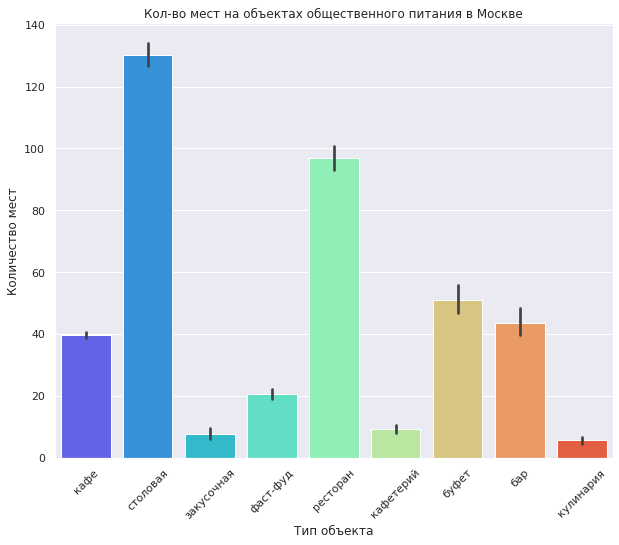

In [25]:
ax = sns.barplot(x='object_type', y='number_of_seats', data=df, palette="rainbow")
ax.set_xlabel('Тип объекта')
ax.set_ylabel('Количество мест')
ax.set_title('Кол-во мест на объектах общественного питания в Москве')
plt.xticks(rotation=45)
plt.show()

__Вывод:__ Лучше всего дела обстоят у столовых и ресторанов.

___

__Выделите в отдельный столбец информацию об улице из столбца address .__

In [26]:
df['street']=df['address'].str.extract(
    '(([A-zА-я0-9\sёЁ -]+)?(улица|переулок|шоссе|проспект|бульвар|площадь|проезд|набережная|аллея)([ A-zА-я0-9]+)?)')[0]
df_street = df[~(df['street'].isnull())]
df['street'] = df['street'].str.strip()
df

,id,object_name,chain,object_type,address,number_of_seats,street
0,151635,СМЕТАНА,сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,сеть,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,несетевое,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,несетевое,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,несетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,несетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,несетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


___

__Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?__

In [27]:
#импортируем файл с районами из гугл-дока
spreadsheet_id = '1cfKSDKpDEx8EYXV3czRv7BwC64gYtySbi27zLQHro_E'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz = pd.read_csv(BytesIO(r.content))
mosgaz['street'] = mosgaz['street'].str.strip()
mosgaz

,street,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район
...,...,...
4393,Вознесенский проезд,Пресненский район
4394,Волков переулок,Пресненский район
4395,Поварская улица,Пресненский район
4396,Кудринская площадь,Пресненский район


In [28]:
df_merged = df.merge(mosgaz, on='street', how = 'left')
df_merged

,id,object_name,chain,object_type,address,number_of_seats,street,area
0,151635,СМЕТАНА,сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район
1,77874,Родник,сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,77874,Родник,сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Нижегородский район
3,77874,Родник,сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Район Южное Бутово
4,24309,Кафе «Академия»,сеть,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
...,...,...,...,...,...,...,...,...
29440,209264,Шоколадница,несетевое,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал,Басманный район
29441,209186,Шоколадница,несетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,Таганский район
29442,209186,Шоколадница,несетевое,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал,Басманный район
29443,221900,Шоколадница,несетевое,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе,Район Внуково


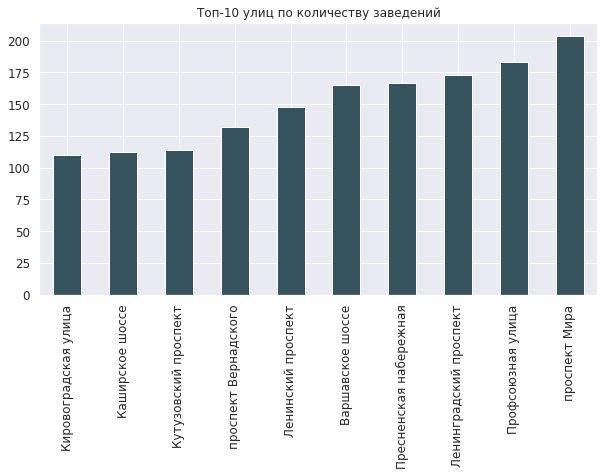

In [29]:
top_10_streets = (df.query('street not in "город Зеленоград"')['street']
                  .value_counts().head(10).sort_values())
plt.figure(figsize=(10, 5))
top_10_streets.plot(kind='bar')
plt.title('Топ-10 улиц по количеству заведений')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [30]:
groupped_area = df_merged.pivot_table(index=('area', 'street'), values='object_type', aggfunc='count').sort_values(by='object_type', ascending=False)
groupped_area

object_type
area               street                              
Алексеевский район проспект Мира                    204
Район Марьина роща проспект Мира                    204
Останкинский район проспект Мира                    204
Мещанский район    проспект Мира                    204
Район Свиблово     проспект Мира                    204
...                                                 ...
Район Щукино       улица Маршала Новикова             1
                   улица Маршала Мерецкова            1
Район Богородское  Миллионная улица                   1
                   улица Богородский Вал              1
Ярославский Район  улица Ротерта                      1

[2183 rows x 1 columns]

- Проспект Мира: Мещанский, Марьина Роща, Алексеевский, Останкинский, Свиблово, Ростокино
- Профсоюзная улица: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
- Ленинградский проспект: Беговой, Аэропорт, Сокол, Хорошёвский
- Пресненская набережная: Пресненский
- Варшавское шоссе: Донской, Нагатино-Садовники, Нагорный
- Ленинский проспект: Гагаринский и Донской
- Проспект Вернадского: Проспект Вернадского
- Кутузовский проспект: Дорогомилово, Фили-Давыдково
- Каширское шоссе: Нагатино-Садовники и Нагорный
- Ходынский бульвар: Хорошёвский

___

__Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?__

In [31]:
streets_count = df_merged.groupby(['area','street'])['object_name'].count().reset_index()
streets_one_object = streets_count[streets_count['object_name'] == 1]
area_one_object = streets_one_object['area'].unique()
area_one_object

array(['Алексеевский район', 'Алтуфьевский район', 'Бабушкинский район',
       'Басманный район', 'Бескудниковский Район', 'Бутырский район',
       'Войковский Район', 'Головинский район', 'Даниловский район',
       'Дмитровский район', 'Донской район', 'Красносельский район',
       'Лосиноостровский район', 'Мещанский район', 'Можайский Район',
       'Молжаниновский район', 'Нагорный район', 'Нижегородский район',
       'Обручевский район', 'Останкинский район', 'Панфиловский район',
       'Пресненский район', 'Район Арбат', 'Район Аэропорт',
       'Район Беговой', 'Район Бирюлево Восточное', 'Район Богородское',
       'Район Внуково', 'Район Восточное Измайлово', 'Район Восточный',
       'Район Выхино-Жулебино', 'Район Гольяново', 'Район Дорогомилово',
       'Район Замоскворечье', 'Район Западное Дегунино', 'Район Зюзино',
       'Район Ивановское', 'Район Измайлово', 'Район Коньково',
       'Район Коптево', 'Район Косино-Ухтомский', 'Район Котловка',
       'Район Крюков

In [32]:
print("Количество улиц с одним заведением:", streets_one_object['street'].count())
print("Количество районов, в которых находятся улицы с одним заведением:", len(area_one_object))

Количество улиц с одним заведением: 529
Количество районов, в которых находятся улицы с одним заведением: 98


___

# Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [33]:
distribution = df.groupby('street').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(distribution['street'])

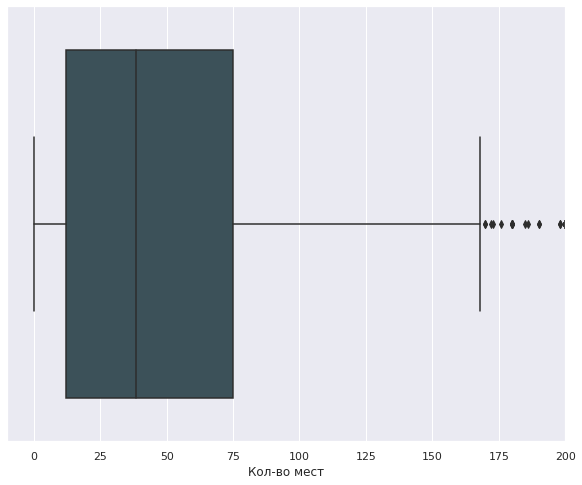

In [34]:
temp = df[df['street'].isin(top_10)]
ax = sns.boxplot(x=temp['number_of_seats'])
ax.set_xlim(-10,200)
ax.set_xlabel('Кол-во мест')
plt.show()

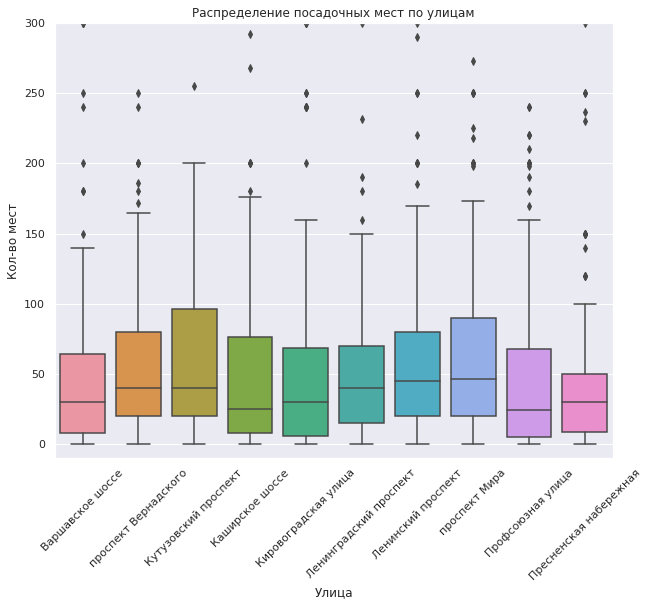

In [35]:
ax = sns.boxplot(x="street", y="number_of_seats", data=temp, orient='v')
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
ax.set_ylabel('Кол-во мест')
ax.set_xlabel('Улица')
plt.title('Распределение посадочных мест по улицам')
plt.show()

__Вывод:__ Для большинства улиц, основной характерной чертой является небольшое количество посадочных мест до 50.

___

# Шаг №3. Подготовка презентации

https://disk.yandex.by/i/0Ooy3Z4pVzkXHA

__Общие выводы и рекомендации вписал в презентации.__